In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import arange
from sklearn.metrics import roc_auc_score
from scipy import stats

%matplotlib inline

def reorder_columns(df, column_order):
    """
    Reorders the columns of a DataFrame based on the specified column order.
    
    Parameters:
        df (DataFrame): The DataFrame whose columns need to be reordered.
        column_order (list): A list of column names specifying the desired order.
        
    Returns:
        DataFrame: A new DataFrame with columns reordered according to the specified order.
    """
    # Check if all column names in column_order exist in the DataFrame
    missing_columns = set(column_order) - set(df.columns)
    if missing_columns:
        raise ValueError(f"The following columns are missing from the DataFrame: {missing_columns}")
    
    # Reorder the columns
    return df[column_order]

def drop_columns(df, columns_to_drop):
    """
    Törli az adatkeretből a megadott oszlopokat.
    
    Parameters:
        df (DataFrame): Az adatkeret, amelyből az oszlopokat törölni kell.
        columns_to_drop (list vagy str): A törlendő oszlop(ok) neve(i).
            Ha csak egy oszlopot kell törölni, akkor stringként adható meg az oszlop neve.
            Ha több oszlopot kell törölni, akkor ezeket egy listában kell megadni.
        
    Returns:
        DataFrame: Az új adatkeret a törölt oszlop(ok) nélkül.
    """
    # Ha csak egy oszlopot kell törölni, alakítsuk listává
    if isinstance(columns_to_drop, str):
        columns_to_drop = [columns_to_drop]
    
    # Töröljük az oszlopokat és térjünk vissza az új adatkerettel
    return df.drop(columns=columns_to_drop)


In [3]:
import sys
import h2o
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.automl import H2OAutoML

In [4]:
# Ha GradientBoosting algoritmust szeretnénk használni, akkor a memória max 2/3-ra állíthatjuk a max_mem_size paramétert
h2o.init(ip="localhost", port=54323,max_mem_size = "5G")

Checking whether there is an H2O instance running at http://localhost:54323..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM (build 17+35-2724, mixed mode, sharing)
  Starting server from C:\Users\zertr\anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\zertr\AppData\Local\Temp\tmpepm0dpvj
  JVM stdout: C:\Users\zertr\AppData\Local\Temp\tmpepm0dpvj\h2o_admin_started_from_python.out
  JVM stderr: C:\Users\zertr\AppData\Local\Temp\tmpepm0dpvj\h2o_admin_started_from_python.err
  Server is running at http://127.0.0.1:54323
Connecting to H2O server at http://127.0.0.1:54323 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Europe/Budapest
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,1 month and 28 days
H2O_cluster_name:,H2O_from_python_admin_24vbyp
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,5 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [5]:
#df = pd.DataFrame()
#df = h2o.import_file('04.elemzett_joined_versenyadatok.temp3.csv')
#df = pd.read_csv('04.elemzett_joined_versenyadatok.temp3.csv',sep=';', encoding='utf-8')
#df.head(5)


In [109]:
dfr = pd.DataFrame()
dfr = pd.read_csv('04.elemzett_joined_versenyadatok.temp3.csv',sep=';', encoding='utf-8')
print(dfr.head(2))
for column, dtype in dfr.dtypes.items():
    print(f"Column: {column}, Data Type: {dtype}")
column_dict = {idx: col_name for idx, col_name in enumerate(dfr.columns)}
print("Column names dictionary:")
print(column_dict)   
print(dfr.shape)  

   place  wind_degree  wind_kph            whenlabel  datum  total  who  \
0      1    145.49348  9.707711  2023-04-22 10:11:57      0  17.01    5   
1      1    145.49348  9.707711  2023-04-22 10:11:57      0  19.43    0   

      start  T_count              run  ...  datumlabel  name  W_max W_count  \
0  0.160000      0.0  Hanacke skvarek  ...  2023-04-22     2    7.0     7.0   
1  0.208117      0.0  Hanacke skvarek  ...  2023-04-22    10    0.0     4.0   

  L_count    temp_c WLTlabel   dog  WLT  hurdless  
0     6.0  15.07446        L  4.22    0      25.0  
1     8.0  15.07446        L  4.28    0      25.0  

[2 rows x 27 columns]
Column: place, Data Type: int64
Column: wind_degree, Data Type: float64
Column: wind_kph, Data Type: float64
Column: whenlabel, Data Type: object
Column: datum, Data Type: int64
Column: total, Data Type: float64
Column: who, Data Type: int64
Column: start, Data Type: float64
Column: T_count, Data Type: float64
Column: run, Data Type: object
Column: wind_d

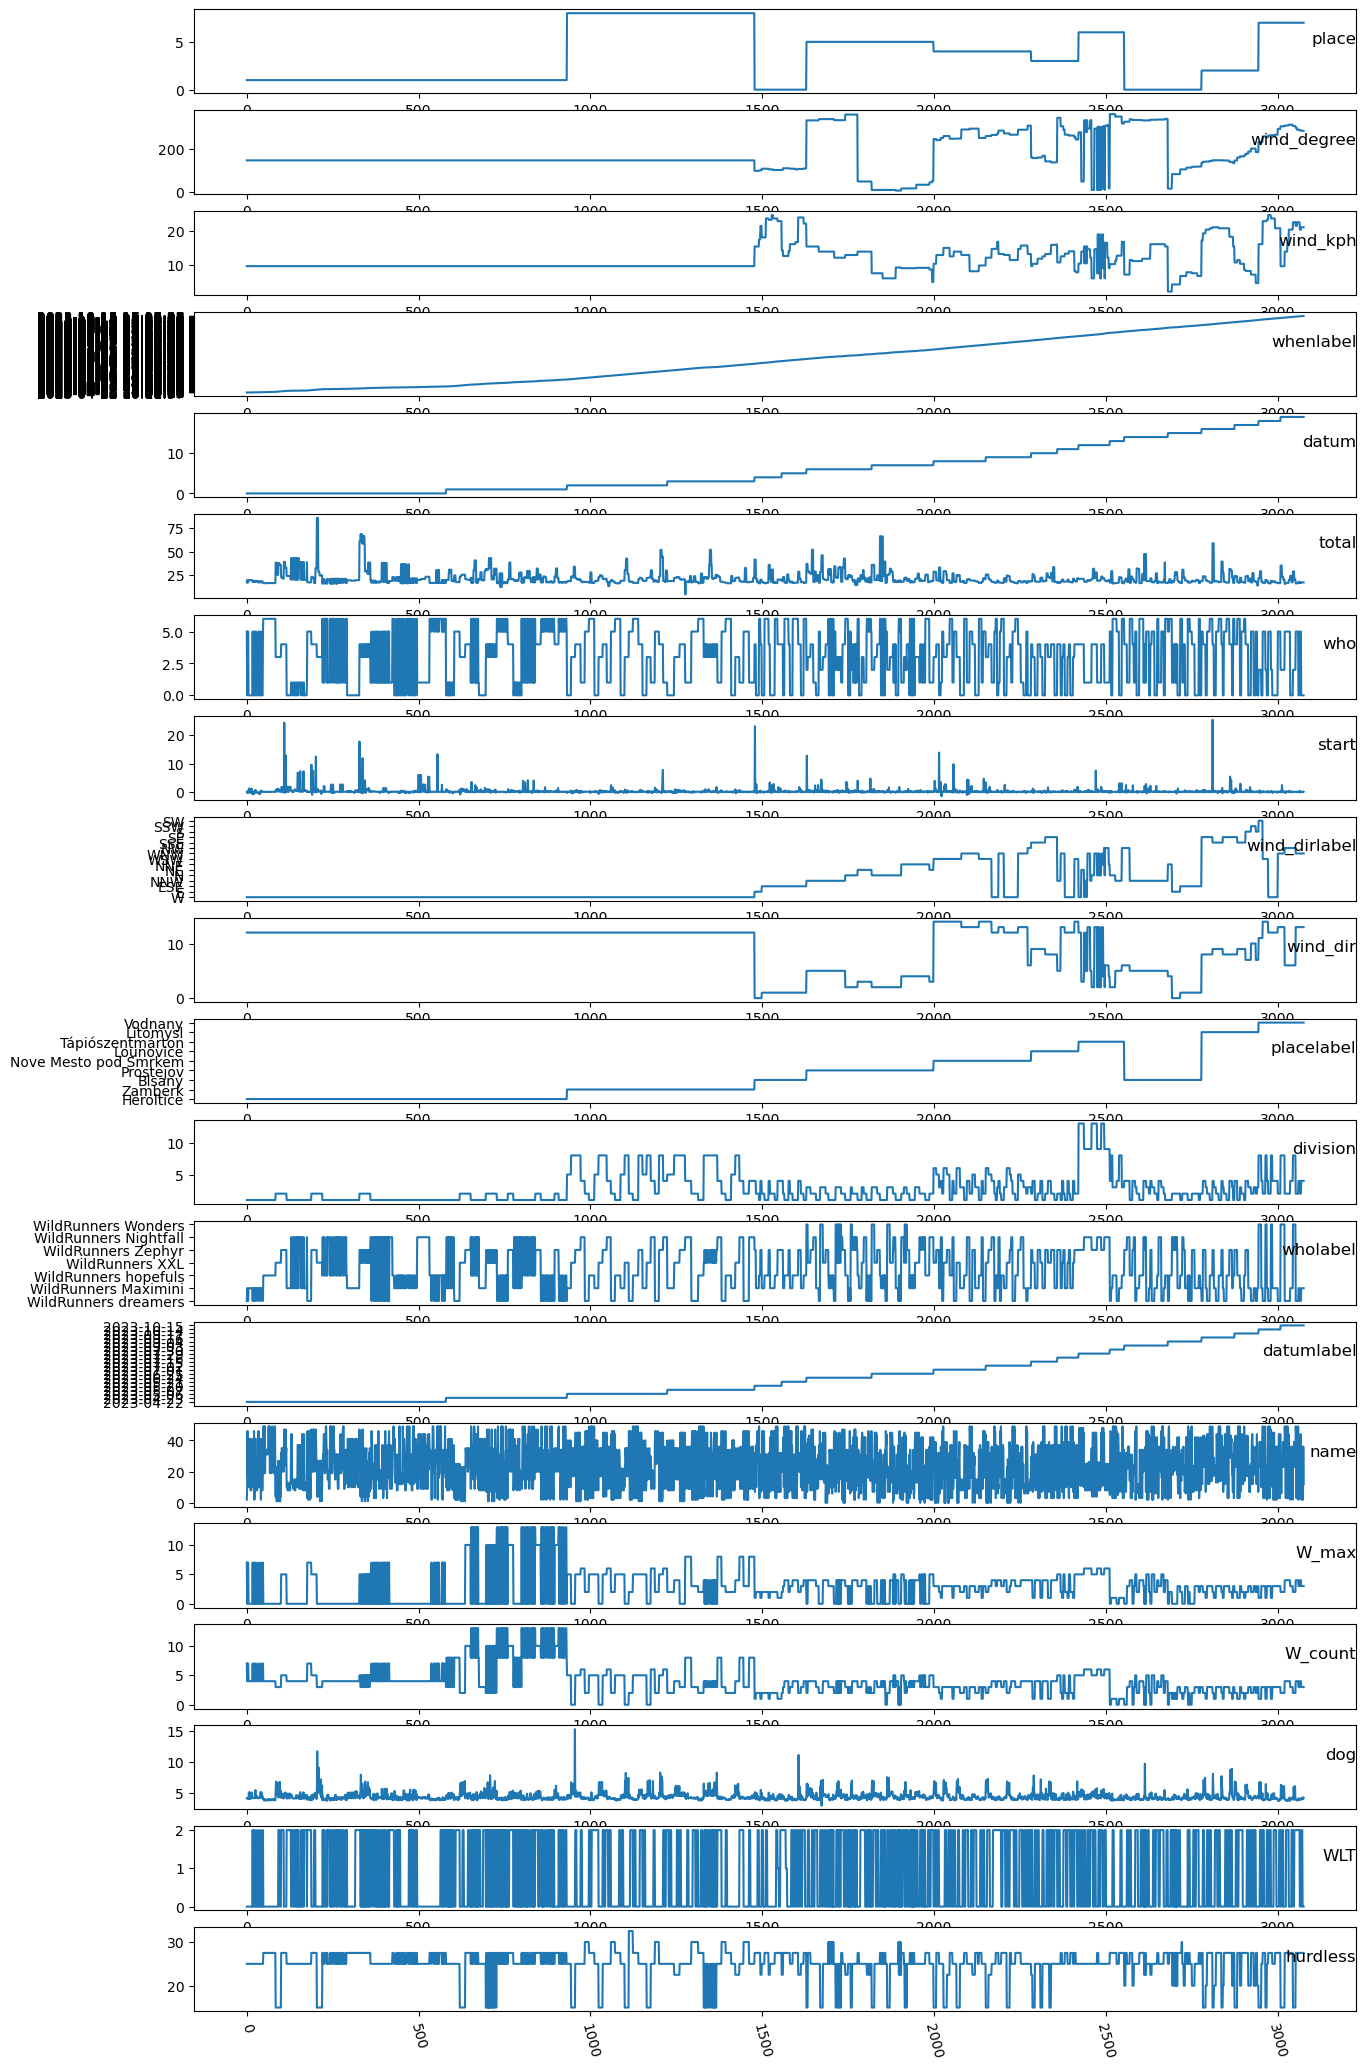

In [39]:
# specify columns to plot
values = dfr.values
groups = [0, 1, 2, 3, 4, 5, 6, 7,10,11,14,15,16,17,18,19,20,24,25,26]
i = 1
# plot each column
plt.figure(figsize=(15, 26))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(dfr.columns[group], y=0.5, loc='right')
    i += 1
plt.xticks(rotation=-75)    
plt.show()

In [40]:
column_dict = {idx: col_name for idx, col_name in enumerate(dfr.columns)}
print("Column names dictionary:")
print(column_dict)   

Column names dictionary:
{0: 'place', 1: 'wind_degree', 2: 'wind_kph', 3: 'whenlabel', 4: 'datum', 5: 'total', 6: 'who', 7: 'start', 8: 'T_count', 9: 'run', 10: 'wind_dirlabel', 11: 'wind_dir', 12: 'when', 13: 'namelabel', 14: 'placelabel', 15: 'division', 16: 'wholabel', 17: 'datumlabel', 18: 'name', 19: 'W_max', 20: 'W_count', 21: 'L_count', 22: 'temp_c', 23: 'WLTlabel', 24: 'dog', 25: 'WLT', 26: 'hurdless'}


In [41]:
column_order = ['when', 'place', 'division','who','total','start','dog','T_count','L_count','W_count','W_max',
                'hurdless','when','datum','total','wind_dir','name','start','division','temp_c','wind_kph','dog',
                'wind_degree','WLT','run','namelabel', 'wholabel','WLTlabel','datumlabel','wind_dirlabel','placelabel',
                'whenlabel']

# Reorder the columns
odf = reorder_columns(dfr, column_order)
print(odf)

      when  place  division  who  total     start      dog  T_count  L_count  \
0        0      1         1    5  17.01  0.160000  4.22000      0.0      6.0   
1        0      1         1    0  19.43  0.208117  4.28000      0.0      8.0   
2        0      1         1    5  17.01 -0.240000  4.21000      0.0      6.0   
3        0      1         1    5  17.01  0.300000  4.24000      0.0      6.0   
4        0      1         1    5  17.01  0.208117  4.13000      0.0      6.0   
...    ...    ...       ...  ...    ...       ...      ...      ...      ...   
3072   639      7         4    0  17.07  0.040000  4.06000      0.0      2.0   
3073   640      7         4    0  16.97  0.208117  4.31692      0.0      2.0   
3074   640      7         4    0  16.97  0.208117  4.17000      0.0      2.0   
3075   640      7         4    0  16.97  0.090000  4.09000      0.0      2.0   
3076   640      7         4    0  16.97  0.208117  4.31000      0.0      2.0   

      W_count  ...  WLT  datum         

In [42]:
column_dict = {idx: col_name for idx, col_name in enumerate(odf.columns)}
print("Column names dictionary:")
print(column_dict)  

Column names dictionary:
{0: 'when', 1: 'place', 2: 'division', 3: 'who', 4: 'total', 5: 'start', 6: 'dog', 7: 'T_count', 8: 'L_count', 9: 'W_count', 10: 'W_max', 11: 'hurdless', 12: 'when', 13: 'datum', 14: 'total', 15: 'wind_dir', 16: 'name', 17: 'start', 18: 'division', 19: 'temp_c', 20: 'wind_kph', 21: 'dog', 22: 'wind_degree', 23: 'WLT', 24: 'datum', 25: 'run', 26: 'namelabel', 27: 'wholabel', 28: 'WLTlabel', 29: 'datumlabel', 30: 'wind_dirlabel', 31: 'placelabel', 32: 'whenlabel'}


In [43]:
odf.to_csv('05.forecast.temp1.csv', sep=';', index=False)  

In [44]:
df1 = odf.copy()
columns_to_drop = df1.iloc[:, 26 : 33]
ndf = df1.drop(columns_to_drop, axis=1)
column_dict = {idx: col_name for idx, col_name in enumerate(ndf.columns)}
print("Column names dictionary:")
print(column_dict)  

Column names dictionary:
{0: 'when', 1: 'place', 2: 'division', 3: 'who', 4: 'total', 5: 'start', 6: 'dog', 7: 'T_count', 8: 'L_count', 9: 'W_count', 10: 'W_max', 11: 'hurdless', 12: 'when', 13: 'datum', 14: 'total', 15: 'wind_dir', 16: 'name', 17: 'start', 18: 'division', 19: 'temp_c', 20: 'wind_kph', 21: 'dog', 22: 'wind_degree', 23: 'WLT', 24: 'datum'}


In [45]:
ndf.to_csv('05.forecast.temp2.csv', sep=';', index=False) 

In [59]:
afr = pd.DataFrame()
afr = pd.read_csv('05.forecast.temp2.csv',sep=';', encoding='utf-8')
print(afr.head(2))

   when  place  division  who  total     start   dog  T_count  L_count  \
0     0      1         1    5  17.01  0.160000  4.22      0.0      6.0   
1     0      1         1    0  19.43  0.208117  4.28      0.0      8.0   

   W_count  ...  wind_dir  name   start.1  division.1    temp_c  wind_kph  \
0      7.0  ...        12     2  0.160000           1  15.07446  9.707711   
1      4.0  ...        12    10  0.208117           1  15.07446  9.707711   

   dog.1  wind_degree  WLT  datum.1  
0   4.22    145.49348    0        0  
1   4.28    145.49348    0        0  

[2 rows x 25 columns]


__One step rolling window forecast__

In [60]:
df2 = afr.copy()
num_lags = 3 # number of lags and window lenghts for mean aggregation
delay = 1 # predict target one step ahead
for column in df2:
    for lag in range(1,num_lags+1):
        df2[column + '_lag' + str(lag)] = df2[column].shift(lag*-1-(delay-1))
        if column != 'wnd_dir':
            df2[column + '_avg_window_length' + str(lag+1)] = df2[column].shift(-1-(delay-1)).rolling(window=lag+1,center=False).mean().shift(1-(lag+1))

df2.dropna(inplace=True) 

mask = (df2.columns.str.contains('W_max') |df2.columns.str.contains('lag') | df2.columns.str.contains('window'))
df_processed = df2[df2.columns[mask]]

# the columns in the processed dataframe
column_dict = {idx: col_name for idx, col_name in enumerate(df_processed.columns)}
print("Column names dictionary:")
print(column_dict) 


Column names dictionary:
{0: 'W_max', 1: 'when_lag1', 2: 'when_avg_window_length2', 3: 'when_lag2', 4: 'when_avg_window_length3', 5: 'when_lag3', 6: 'when_avg_window_length4', 7: 'place_lag1', 8: 'place_avg_window_length2', 9: 'place_lag2', 10: 'place_avg_window_length3', 11: 'place_lag3', 12: 'place_avg_window_length4', 13: 'division_lag1', 14: 'division_avg_window_length2', 15: 'division_lag2', 16: 'division_avg_window_length3', 17: 'division_lag3', 18: 'division_avg_window_length4', 19: 'who_lag1', 20: 'who_avg_window_length2', 21: 'who_lag2', 22: 'who_avg_window_length3', 23: 'who_lag3', 24: 'who_avg_window_length4', 25: 'total_lag1', 26: 'total_avg_window_length2', 27: 'total_lag2', 28: 'total_avg_window_length3', 29: 'total_lag3', 30: 'total_avg_window_length4', 31: 'start_lag1', 32: 'start_avg_window_length2', 33: 'start_lag2', 34: 'start_avg_window_length3', 35: 'start_lag3', 36: 'start_avg_window_length4', 37: 'dog_lag1', 38: 'dog_avg_window_length2', 39: 'dog_lag2', 40: 'dog_

C:\Users\zertr\AppData\Local\Temp\ipykernel_10144\240934830.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[column + '_lag' + str(lag)] = df2[column].shift(lag*-1-(delay-1))
C:\Users\zertr\AppData\Local\Temp\ipykernel_10144\240934830.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[column + '_avg_window_length' + str(lag+1)] = df2[column].shift(-1-(delay-1)).rolling(window=lag+1,center=False).mean().shift(1-(lag+1))
C:\Users\zertr\AppData\Local\Temp\ipykernel_10144\240934830.py:6: PerformanceWarning: DataFrame is 

In [61]:
mask = df_processed.columns.str.contains('W_max')
df_processed[df_processed.columns[mask]].head(10)

,W_max,W_max_lag1,W_max_avg_window_length2,W_max_lag2,W_max_avg_window_length3,W_max_lag3,W_max_avg_window_length4
0,7.0,0.0,3.5,7.0,4.666667,7.0,5.25
1,0.0,7.0,7.0,7.0,7.000000,7.0,5.25
2,7.0,7.0,7.0,7.0,4.666667,0.0,3.50
3,7.0,7.0,3.5,0.0,2.333333,0.0,1.75
4,7.0,0.0,0.0,0.0,0.000000,0.0,0.00
5,0.0,0.0,0.0,0.0,0.000000,0.0,0.00
6,0.0,0.0,0.0,0.0,0.000000,0.0,0.00
7,0.0,0.0,0.0,0.0,0.000000,0.0,0.00
8,0.0,0.0,0.0,0.0,0.000000,0.0,0.00
9,0.0,0.0,0.0,0.0,0.000000,0.0,0.00


In [62]:
df_processed.reset_index(drop=True,inplace=True)
df_train = df_processed.loc[:int(df_processed.shape[0]*0.8),:]
df_test = df_processed.loc[int(df_processed.shape[0]*0.8):,:]

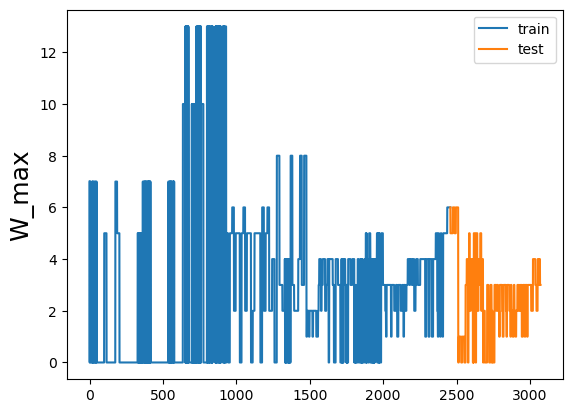

In [63]:
plt.plot(df_train.index,df_train['W_max'])
plt.plot(df_test.index,df_test['W_max'])
plt.ylabel('W_max',fontsize=18)
plt.legend(['train','test'])
plt.show()

In [64]:
hf_train = h2o.H2OFrame(df_train)
hf_test = h2o.H2OFrame(df_test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [65]:
hf_train.describe()

Rows:2459
Cols:151

,W_max,when_lag1,when_avg_window_length2,when_lag2,when_avg_window_length3,when_lag3,when_avg_window_length4,place_lag1,place_avg_window_length2,place_lag2,place_avg_window_length3,place_lag3,place_avg_window_length4,division_lag1,division_avg_window_length2,division_lag2,division_avg_window_length3,division_lag3,division_avg_window_length4,who_lag1,who_avg_window_length2,who_lag2,who_avg_window_length3,who_lag3,who_avg_window_length4,total_lag1,total_avg_window_length2,total_lag2,total_avg_window_length3,total_lag3,total_avg_window_length4,start_lag1,start_avg_window_length2,start_lag2,start_avg_window_length3,start_lag3,start_avg_window_length4,dog_lag1,dog_avg_window_length2,dog_lag2,dog_avg_window_length3,dog_lag3,dog_avg_window_length4,T_count_lag1,T_count_avg_window_length2,T_count_lag2,T_count_avg_window_length3,T_count_lag3,T_count_avg_window_length4,L_count_lag1,L_count_avg_window_length2,L_count_lag2,L_count_avg_window_length3,L_count_lag3,L_count_avg_window_length4,W_count_lag1,W_count_avg_window_length2,W_count_lag2,W_count_avg_window_length3,W_count_lag3,W_count_avg_window_length4,W_max_lag1,W_max_avg_window_length2,W_max_lag2,W_max_avg_window_length3,W_max_lag3,W_max_avg_window_length4,hurdless_lag1,hurdless_avg_window_length2,hurdless_lag2,hurdless_avg_window_length3,hurdless_lag3,hurdless_avg_window_length4,when.1_lag1,when.1_avg_window_length2,when.1_lag2,when.1_avg_window_length3,when.1_lag3,when.1_avg_window_length4,datum_lag1,datum_avg_window_length2,datum_lag2,datum_avg_window_length3,datum_lag3,datum_avg_window_length4,total.1_lag1,total.1_avg_window_length2,total.1_lag2,total.1_avg_window_length3,total.1_lag3,total.1_avg_window_length4,wind_dir_lag1,wind_dir_avg_window_length2,wind_dir_lag2,wind_dir_avg_window_length3,wind_dir_lag3,wind_dir_avg_window_length4,name_lag1,name_avg_window_length2,name_lag2,name_avg_window_length3,name_lag3,name_avg_window_length4,start.1_lag1,start.1_avg_window_length2,start.1_lag2,start.1_avg_window_length3,start.1_lag3,start.1_avg_window_length4,division.1_lag1,division.1_avg_window_length2,division.1_lag2,division.1_avg_window_length3,division.1_lag3,division.1_avg_window_length4,temp_c_lag1,temp_c_avg_window_length2,temp_c_lag2,temp_c_avg_window_length3,temp_c_lag3,temp_c_avg_window_length4,wind_kph_lag1,wind_kph_avg_window_length2,wind_kph_lag2,wind_kph_avg_window_length3,wind_kph_lag3,wind_kph_avg_window_length4,dog.1_lag1,dog.1_avg_window_length2,dog.1_lag2,dog.1_avg_window_length3,dog.1_lag3,dog.1_avg_window_length4,wind_degree_lag1,wind_degree_avg_window_length2,wind_degree_lag2,wind_degree_avg_window_length3,wind_degree_lag3,wind_degree_avg_window_length4,WLT_lag1,WLT_avg_window_length2,WLT_lag2,WLT_avg_window_length3,WLT_lag3,WLT_avg_window_length4,datum.1_lag1,datum.1_avg_window_length2,datum.1_lag2,datum.1_avg_window_length3,datum.1_lag3,datum.1_avg_window_length4
type,int,int,real,int,real,int,real,int,real,int,real,int,real,int,real,int,real,int,real,int,real,int,real,int,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,int,real,int,real,int,real,int,real,int,real,int,real,int,real,int,real,int,real,int,real,int,real,int,real,real,real,real,real,real,real,int,real,int,real,int,real,int,real,int,real,int,real,real,real,real,real,real,real,int,real,int,real,int,real,int,real,int,real,int,real,real,real,real,real,real,real,int,real,int,real,int,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,int,real,int,real,int,real,int,real,int,real,int,real
mins,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.16,4.16,4.16,8.610000000000008,4.16,10.835,-1.37,-0.59,-1.37,-0.59,-1.37,-0.485,3.02,3.8650000000000073,3.02,3.87,3.02,3.895,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,15.0,15.0,15.0,15.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [66]:
y = 'W_max'
X = hf_train.columns
X.remove(y)

In [67]:
#aml = H2OAutoML(max_models =20, max_runtime_secs = 600, seed =1)
aml = H2OAutoML(max_runtime_secs = 600,seed = 42)
aml.train(x = X, 
          y = y,
          training_frame = hf_train,
          leaderboard_frame = hf_test)


AutoML progress: |
15:58:18.213: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_1_20240512_155818_model_18


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    30                 30                          19702                  7            7            7             26            62            47.6333

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 2.5074724066234797
RMSE: 1.5835000494548397
MAE: 0.9137757471105483
RMSLE: 0.5079588802301068
Mean Residual Deviance: 2.5074724066234797

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 5.549080658039826
RMSE: 2.355648670332617
MAE: 1.3007891911855687
RMSLE: 0.6552193732877342
Mean Residual Deviance: 5.549080658039826

Cross-Validation Metrics Summary: 
                        mean      sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ---------  ------------  ------------  ------------  ------------  ------------
aic                     nan       0          nan           nan           nan           nan           nan
loglikelihood           nan       0          nan           nan           nan           nan           nan
mae                     1.27907   0.0275941  1.30752       1.24617       1.26616       1.3082        1.26732
mean_residual_deviance  5.60848   0.429251   6.26211       5.19446       5.66567       5.67345       5.24669
mse                     5.60848   0.429251   6.26211       5.19446       5.66567       5.67345       5.24669
r2                      0.439788  0.0532377  0.364937      0.508901      0.416697      0.452089      0.456317
residual_deviance       5.60848   0.429251   6.26211       5.19446       5.66567       5.67345       5.24669
rmse                    2.36686   0.0898595  2.50242       2.27914       2.38027       2.3819        2.29057
rmsle                   0.65419   0.0298465  0.695568      0.632686      0.63405       0.632153      0.676492

Scoring History: 
    timestamp            duration          number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------------  -----------------  ---------------  --------------  -------------------
    2024-05-12 16:01:11  1 min 38.480 sec  0                  3.16899          2.45508         10.0425
    2024-05-12 16:01:11  1 min 38.577 sec  5                  2.49351          1.8734          6.21759
    2024-05-12 16:01:11  1 min 38.866 sec  10                 2.11262          1.49384         4.46316
    2024-05-12 16:01:11  1 min 38.953 sec  15                 1.89464          1.24959         3.58967
    2024-05-12 16:01:11  1 min 39.054 sec  20                 1.75669          1.09205         3.08596
    2024-05-12 16:01:12  1 min 39.145 sec  25                 1.66224          0.988408        2.76304
    2024-05-12 16:01:12  1 min 39.228 sec  30                 1.5835           0.913776        2.50747

Variable Importances: 
variable                        relative_importance    scaled_importance    percentage
------------------------------  ---------------------  -------------------  --------------------
W_max_avg_window_length2        24838.060546875        1.0                  0.2544817062342912
W_max_avg_window_length4        12368.6640625          0.4979722164360439   0.1267248192959162
W_count_lag1                    7104.736328125         0.28604231456464835  0.07279253626561756
W_max_avg_window_length3        5406.97021484375       0.2176889054859812   0.05539784409634785
W_max_lag1                      3414.517822265625      0.137471193285066    0.03498390382524763
W_count_avg_window_length2      2685.00537109375       0.1081004439145537   0.

In [68]:
#aml.explain(train)

In [69]:
#lb = aml.leaderboard
#lb.head(rows=lb.nrows)

lb = aml.leaderboard
lb

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
GBM_grid_1_AutoML_1_20240512_155818_model_18,0.831802,0.691895,0.51531,0.357342,0.691895
StackedEnsemble_AllModels_1_AutoML_1_20240512_155818,0.846721,0.716936,0.522613,0.365059,0.716936
GBM_2_AutoML_1_20240512_155818,0.851043,0.724274,0.535398,0.361233,0.724274
StackedEnsemble_AllModels_3_AutoML_1_20240512_155818,0.853206,0.72796,0.546317,0.370243,0.72796
GBM_grid_1_AutoML_1_20240512_155818_model_10,0.853539,0.728529,0.555152,0.36757,0.728529
GBM_grid_1_AutoML_1_20240512_155818_model_15,0.855099,0.731194,0.536362,0.36365,0.731194
GBM_grid_1_AutoML_1_20240512_155818_model_14,0.855707,0.732234,0.532561,0.356687,0.732234
GBM_grid_1_AutoML_1_20240512_155818_model_2,0.856168,0.733023,0.564808,0.360707,0.733023
GBM_grid_1_AutoML_1_20240512_155818_model_12,0.85667,0.733883,0.538133,0.374241,0.733883
StackedEnsemble_BestOfFamily_1_AutoML_1_20240512_155818,0.859002,0.737885,0.533579,0.362731,0.737885


In [70]:
#best_model = aml.get_best_model()
#print(best_model)
leader_model = aml.leader


In [71]:
hf_test_predict = leader_model.predict(hf_test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [72]:
hf_test_predict.head(5)

predict
5.05155
4.93847
5.00345
4.73666
5.05892


In [74]:
df_results = pd.DataFrame()
df_results['ground_truth'] = df_test['W_max'].reset_index(drop=True)
df_results['predictions'] = h2o.as_list(hf_test_predict,use_pandas=True)
df_results.head()

C:\Users\zertr\anaconda3\Lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


,ground_truth,predictions
0,6.0,5.051554
1,5.0,4.938471
2,5.0,5.003454
3,5.0,4.736659
4,5.0,5.058923


In [75]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x=df_results['predictions'],y=df_results['ground_truth'])
print('R2 = ',r_value*r_value)

R2 =  0.7383497304561073


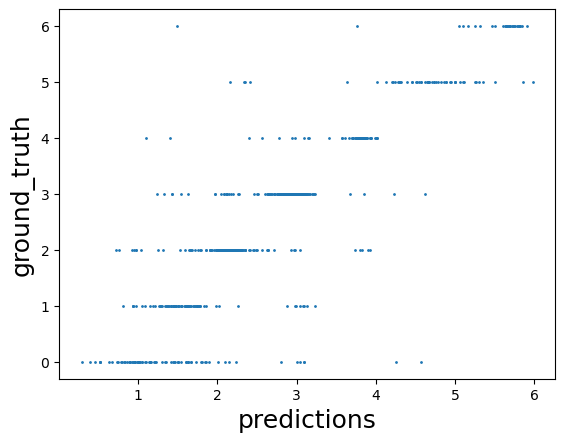

In [76]:
plt.scatter(x=df_results['predictions'],y=df_results['ground_truth'],s=1)
plt.xlabel('predictions',fontsize=18)
plt.ylabel('ground_truth',fontsize=18)
plt.show()

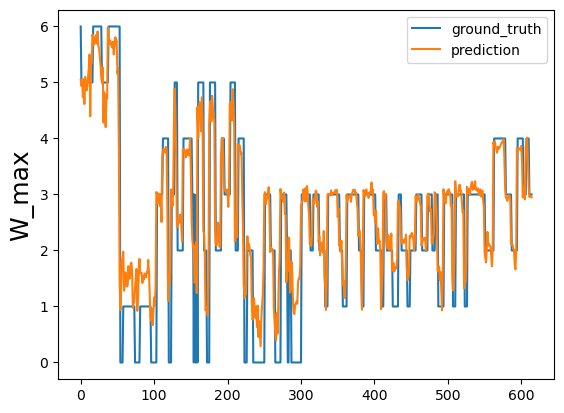

In [77]:
plt.plot(df_results['ground_truth'])
plt.plot(df_results['predictions'])
plt.ylabel('W_max',fontsize=18)
plt.legend(['ground_truth','prediction'])
plt.show()

__5 Step rolling window forecast__

In [78]:
df = pd.DataFrame()
df = pd.read_csv('05.forecast.temp2.csv',sep=';', encoding='utf-8')
print(df.head(2))

   when  place  division  who  total     start   dog  T_count  L_count  \
0     0      1         1    5  17.01  0.160000  4.22      0.0      6.0   
1     0      1         1    0  19.43  0.208117  4.28      0.0      8.0   

   W_count  ...  wind_dir  name   start.1  division.1    temp_c  wind_kph  \
0      7.0  ...        12     2  0.160000           1  15.07446  9.707711   
1      4.0  ...        12    10  0.208117           1  15.07446  9.707711   

   dog.1  wind_degree  WLT  datum.1  
0   4.22    145.49348    0        0  
1   4.28    145.49348    0        0  

[2 rows x 25 columns]


In [80]:
df2 = df.copy()
num_lags = 5 # number of lags and window lenghts for mean aggregation
delay = 5 # predict target five steps ahead
for column in df2:
    for lag in range(1,num_lags+1):
        df2[column + '_lag' + str(lag)] = df2[column].shift(lag*-1-(delay-1))
        if column != 'wnd_dir':
            df2[column + '_avg_window_length' + str(lag+1)] = df2[column].shift(-1-(delay-1)).rolling(window=lag+1,center=False).mean().shift(1-(lag+1))

df2.dropna(inplace=True) 

mask = (df2.columns.str.contains('W_max') | df2.columns.str.contains('lag') | df2.columns.str.contains('window'))
df_processed = df2[df2.columns[mask]]

df_processed.reset_index(drop=True,inplace=True)
df_train = df_processed.loc[:int(df_processed.shape[0]*0.8),:]
df_test = df_processed.loc[int(df_processed.shape[0]*0.8):,:]

hf_train = h2o.H2OFrame(df_train)
hf_test = h2o.H2OFrame(df_test)

y = 'W_max'
x = hf_train.columns
x.remove(y)

aml = H2OAutoML(max_runtime_secs = 600,
                seed = 42)
aml.train(x = x, 
          y = y,
          training_frame = hf_train,
          leaderboard_frame = hf_test)

leader_model = aml.leader

hf_test_predict = leader_model.predict(hf_test)

df_results = pd.DataFrame()
df_results['ground_truth'] = df_test['W_max'].reset_index(drop=True)
df_results['predictions'] = h2o.as_list(hf_test_predict,use_pandas=True)

slope, intercept, r_value, p_value, std_err = stats.linregress(x=df_results['predictions'],y=df_results['ground_truth'])
print('R2 = ',r_value*r_value)


C:\Users\zertr\AppData\Local\Temp\ipykernel_10144\1913808415.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[column + '_lag' + str(lag)] = df2[column].shift(lag*-1-(delay-1))
C:\Users\zertr\AppData\Local\Temp\ipykernel_10144\1913808415.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[column + '_avg_window_length' + str(lag+1)] = df2[column].shift(-1-(delay-1)).rolling(window=lag+1,center=False).mean().shift(1-(lag+1))
C:\Users\zertr\AppData\Local\Temp\ipykernel_10144\1913808415.py:6: PerformanceWarning: DataFrame 

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
16:35:15.910: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
R2 =  0.30018908254886384


C:\Users\zertr\anaconda3\Lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


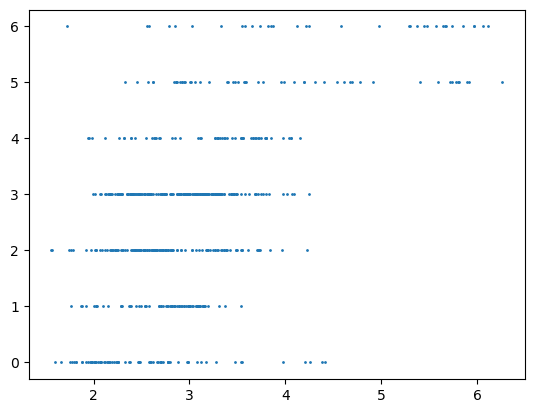

In [81]:
plt.scatter(x=df_results['predictions'],y=df_results['ground_truth'],s=1)
plt.show()

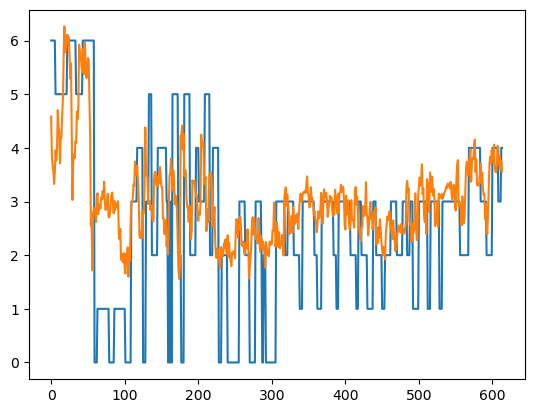

In [82]:
plt.plot(df_results['ground_truth'])
plt.plot(df_results['predictions'])
plt.show()

In [108]:
column_dict = {idx: col_name for idx, col_name in enumerate(df_results.columns)}
print("Column names dictionary:")
print(column_dict)  
print(df_results.shape)

Column names dictionary:
{0: 'ground_truth', 1: 'predictions'}
(614, 2)


In [ ]:
python_df = df_results.as_data_frame()

In [105]:
performance = best_model.model_performance(hf_test)
print(performance)

ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 1.9658136740879966
RMSE: 1.4020747747848532
MAE: 1.078303249486879
RMSLE: 0.5287927376562379
Mean Residual Deviance: 1.9658136740879966


In [85]:
best_model = aml.get_best_model()
print(best_model)

Model Details
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_3_20240512_163515_model_22


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    43                 43                          11837                  6            6            6             9             25            17.186

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 4.497193482137911
RMSE: 2.1206587377835953
MAE: 1.4576179685994084
RMSLE: 0.6501998471011877
Mean Residual Deviance: 4.497193482137911

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 6.480155883214162
RMSE: 2.5456150304423804
MAE: 1.7189050118642768
RMSLE: 0.7274968164477704
Mean Residual Deviance: 6.4

In [87]:
performance = best_model.model_performance(hf_test)
print(performance)

ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 1.9658136740879966
RMSE: 1.4020747747848532
MAE: 1.078303249486879
RMSLE: 0.5287927376562379
Mean Residual Deviance: 1.9658136740879966


In [90]:
best_model.model_performance(hf_test)

ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 1.9658136740879966
RMSE: 1.4020747747848532
MAE: 1.078303249486879
RMSLE: 0.5287927376562379
Mean Residual Deviance: 1.9658136740879966

__Save the model__

In [91]:
model_path = h2o.save_model(model=best_model,path='./h20_best.05.forecast.V01', force=True)

In [92]:
print(model_path)

C:\SCS\03MI\proj\005.MT.1.haziverseny\F7\seged\h20_best.05.forecast.V01\GBM_grid_1_AutoML_3_20240512_163515_model_22


In [93]:
loaded_model = h2o.load_model(path=model_path)
loaded_model.params.keys()

dict_keys(['model_id', 'training_frame', 'validation_frame', 'nfolds', 'keep_cross_validation_models', 'keep_cross_validation_predictions', 'keep_cross_validation_fold_assignment', 'score_each_iteration', 'score_tree_interval', 'fold_assignment', 'fold_column', 'response_column', 'ignored_columns', 'ignore_const_cols', 'offset_column', 'weights_column', 'balance_classes', 'class_sampling_factors', 'max_after_balance_size', 'max_confusion_matrix_size', 'ntrees', 'max_depth', 'min_rows', 'nbins', 'nbins_top_level', 'nbins_cats', 'r2_stopping', 'stopping_rounds', 'stopping_metric', 'stopping_tolerance', 'max_runtime_secs', 'seed', 'build_tree_one_node', 'learn_rate', 'learn_rate_annealing', 'distribution', 'quantile_alpha', 'tweedie_power', 'huber_alpha', 'checkpoint', 'sample_rate', 'sample_rate_per_class', 'col_sample_rate', 'col_sample_rate_change_per_level', 'col_sample_rate_per_tree', 'min_split_improvement', 'histogram_type', 'max_abs_leafnode_pred', 'pred_noise_bandwidth', 'categor

In [94]:
for p in loaded_model.params.keys():
    v = best_model.params[p]["actual"]
    if (p != "model_id") & (p != "training_frame") & (p != "validation_frame"):
        print(f"{p:{40}} {v}")

nfolds                                   5
keep_cross_validation_models             False
keep_cross_validation_predictions        True
keep_cross_validation_fold_assignment    False
score_each_iteration                     False
score_tree_interval                      5
fold_assignment                          Modulo
fold_column                              None
response_column                          {'__meta': {'schema_version': 3, 'schema_name': 'ColSpecifierV3', 'schema_type': 'VecSpecifier'}, 'column_name': 'W_max', 'is_member_of_frames': None}
ignored_columns                          []
ignore_const_cols                        True
offset_column                            None
weights_column                           None
balance_classes                          False
class_sampling_factors                   None
max_after_balance_size                   5.0
max_confusion_matrix_size                20
ntrees                                   43
max_depth                        

In [97]:
test_predicted = loaded_model.predict(hf_test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [98]:
test_predicted

predict
4.58577
3.85188
3.65283
3.57841
3.32499
3.54378
3.95393
3.76341
3.98352
4.6999


In [100]:
predited_df = h2o.as_list(test_predicted)
test_df = h2o.as_list(hf_test)
predicted_test_df = pd.concat([test_df, predited_df], axis=1)

C:\Users\zertr\anaconda3\Lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
C:\Users\zertr\anaconda3\Lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting

In [101]:
predicted_test_df

,W_max,when_lag1,when_avg_window_length2,when_lag2,when_avg_window_length3,when_lag3,when_avg_window_length4,when_lag4,when_avg_window_length5,when_lag5,...,datum.1_avg_window_length2,datum.1_lag2,datum.1_avg_window_length3,datum.1_lag3,datum.1_avg_window_length4,datum.1_lag4,datum.1_avg_window_length5,datum.1_lag5,datum.1_avg_window_length6,predict
0,6,481,481.5,482,481.666667,482,481.75,482,481.8,482,...,12.0,12,12.0,12,12.0,12,12.0,12,12.0,4.585766
1,6,482,482.0,482,482.000000,482,482.00,482,482.2,483,...,12.0,12,12.0,12,12.0,12,12.0,12,12.0,3.851878
2,6,482,482.0,482,482.000000,482,482.25,483,482.4,483,...,12.0,12,12.0,12,12.0,12,12.0,12,12.0,3.652828
3,6,482,482.0,482,482.333333,483,482.50,483,482.6,483,...,12.0,12,12.0,12,12.0,12,12.0,12,12.0,3.578409
4,6,482,482.5,483,482.666667,483,482.75,483,482.8,483,...,12.0,12,12.0,12,12.0,12,12.0,12,12.0,3.324991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,3,638,638.0,638,638.333333,639,638.50,639,638.6,639,...,19.0,19,19.0,19,19.0,19,19.0,19,19.0,3.684741
610,3,638,638.5,639,638.666667,639,638.75,639,638.8,639,...,19.0,19,19.0,19,19.0,19,19.0,19,19.0,3.828148
611,3,639,639.0,639,639.000000,639,639.00,639,639.2,640,...,19.0,19,19.0,19,19.0,19,19.0,19,19.0,3.584894
612,4,639,639.0,639,639.000000,639,639.25,640,639.4,640,...,19.0,19,19.0,19,19.0,19,19.0,19,19.0,3.746502


In [110]:
h2o.cluster().shutdown()

H2O session _sid_a7f8 closed.
